In [68]:
#Generic
import numpy as np,pandas as pd, matplotlib.pyplot as plt, seaborn as sns, joblib
from matplotlib.ticker import FormatStrFormatter

#Statistics
from scipy.stats import zscore

#Scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Skewness
from sklearn.preprocessing import PowerTransformer

#Train Test Split
from sklearn.model_selection import train_test_split

#Resample
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest,chi2,f_classif, VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Decomposition
from sklearn.decomposition import PCA

#Cross Validation
from sklearn.model_selection import cross_val_score

#Hypertune Parameters
from sklearn.model_selection import GridSearchCV

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


#Classification Metrics
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,recall_score,precision_score
from sklearn.metrics import auc,roc_curve

In [69]:
df=pd.read_csv('Data file.csv')

In [70]:
#Check head
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [71]:
#Delete first column of index
df=df.drop('Unnamed: 0',axis=1)

In [72]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [73]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [74]:
sum(df.duplicated())

1

In [75]:
#Drop Duplicates
df=df.drop_duplicates()

In [76]:
#Check Object type columns
df.select_dtypes('object').columns

Index(['msisdn', 'pcircle', 'pdate'], dtype='object')

In [77]:
#Drop pcircle
df=df.drop('pcircle',axis=1)

In [78]:
#Change dtype of pdate to datetime64
df['pdate']=pd.to_datetime(df['pdate'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


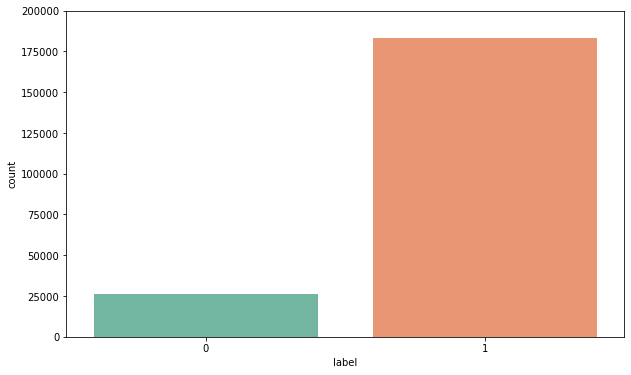

In [79]:
#Check count of Label
plt.figure(figsize=(10,6))
sns.countplot(df['label'],palette='Set2')
plt.ylim(0,200000)
plt.show()
#As we can see the label is highly imbalanced

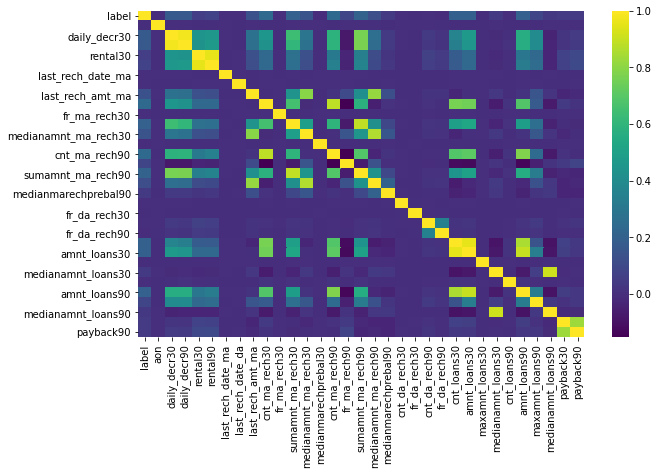

In [80]:
#Plot heatmap to check correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='viridis')
plt.show()

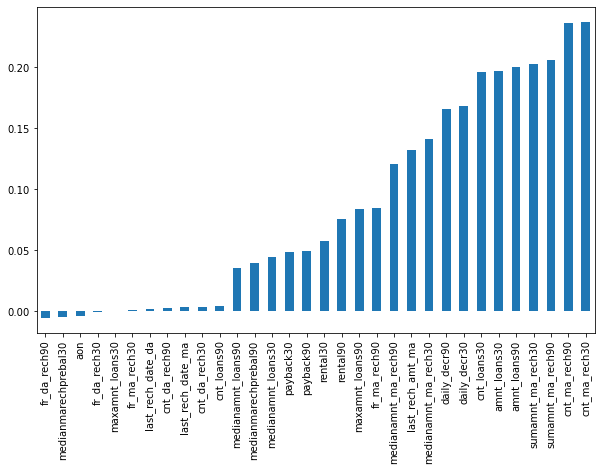

In [81]:
#Plot barplot to check correlation
plt.figure(figsize=(10,6))
df.corr()['label'].drop('label').sort_values().plot(kind='bar')
plt.show()

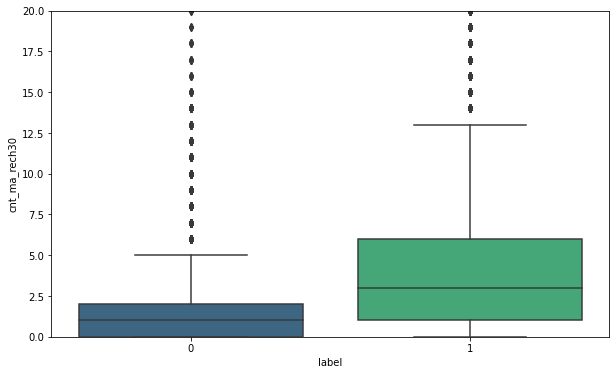

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label',y='cnt_ma_rech30',data=df,palette='viridis')
plt.ylim(0,20)
plt.show()

In [83]:
#Check value counts of pdate
df['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64

In [84]:
#Extract new column of month
df['pmonth']=df['pdate'].dt.month

In [85]:
#No need to extract year as there is only one distinct value
df['pdate'].dt.year.nunique()

1

In [86]:
#Drop pdate column
df=df.drop(['pdate'],axis=1)

In [87]:
df=df.drop('msisdn',axis=1)

In [88]:
#Check Skewness and Detect Outlier
q1=df.quantile(q=0.25)
q3=df.quantile(q=0.75)
#Create IQR Range
IQR=q3-q1
lower_bound = q1 - 1.5*IQR
higer_bound = q3 + 1.5*IQR

In [89]:
#Create function for Outlier Detection
def remove_outlier(df,col,inp):
    if inp==False:
        df_copy=df.copy()
        raw=df_copy[col].shape[0]
        df_copy=df_copy[(df_copy[col]>=lower_bound[col]) & (df_copy[col]<=higer_bound[col])]
        prcsd=df_copy[col].shape[0]
        
        percent_change=(((raw-prcsd)/raw)*100)
        outliers=raw-prcsd
        
        print("{} outliers are detected for column {} with percent change being {}".format(outliers,col,percent_change))
    elif inp==True:
        raw=df[col].shape[0]
        df=df[(df[col]>=lower_bound[col]) & (df[col]<=higer_bound[col])]
        prcsd=df[col].shape[0]
        
        percent_change=(((raw-prcsd)/raw)*100)
        outliers=raw-prcsd
        
        print("{} outliers are detected for column {} with percent change being {}".format(outliers,col,percent_change))

In [90]:
#Run Function for each column
for x in df.columns:
    remove_outlier(df,str(x),False)

26162 outliers are detected for column label with percent change being 12.48234665445246
3607 outliers are detected for column aon with percent change being 1.720962632161533
16350 outliers are detected for column daily_decr30 with percent change being 7.80087026222375
18187 outliers are detected for column daily_decr90 with percent change being 8.677335012786749
18526 outliers are detected for column rental30 with percent change being 8.839077827397993
19399 outliers are detected for column rental90 with percent change being 9.25560135883049
20145 outliers are detected for column last_rech_date_ma with percent change being 9.611530974464674
6732 outliers are detected for column last_rech_date_da with percent change being 3.2119546547578155
20864 outliers are detected for column last_rech_amt_ma with percent change being 9.954578419023626
11294 outliers are detected for column cnt_ma_rech30 with percent change being 5.388564449024772
11450 outliers are detected for column fr_ma_rech30 

In [91]:
pt=PowerTransformer()
for x in df.columns.drop('label'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [92]:
df.skew()

label                    -2.270245
aon                       1.654515
daily_decr30             -6.582798
daily_decr90             -7.080271
rental30                 -1.022864
rental90                 -0.962734
last_rech_date_ma        -5.362508
last_rech_date_da      -106.606388
last_rech_amt_ma         -0.061265
cnt_ma_rech30            -0.000144
fr_ma_rech30              0.165014
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189630
medianmarechprebal30     -0.119068
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142950
sumamnt_ma_rech90        -0.192160
medianamnt_ma_rech90     -0.044606
medianmarechprebal90      7.506249
cnt_da_rech30             6.925803
fr_da_rech30             11.390638
cnt_da_rech90             6.006561
fr_da_rech90             15.469663
cnt_loans30               0.036243
amnt_loans30              0.001947
maxamnt_loans30          -1.680102
medianamnt_loans30        3.447725
cnt_loans90               0.105583
amnt_loans90        

In [93]:
#Resample the data as it is highly imbalanced
df_minority=df[df['label']==0]
df_majority=df[df['label']==1]

df_minority_upsampled=resample(df_minority,replace=True,n_samples=50000,random_state=101)

df_upsampled=pd.concat([df_majority,df_minority_upsampled],axis=0)

In [94]:
df_minority=df_upsampled[df_upsampled['label']==0]
df_majority=df_upsampled[df_upsampled['label']==1]

df_majority_downsampled=resample(df_majority,replace=False,n_samples=150000,random_state=101)

df_downsampled=pd.concat([df_minority,df_majority_downsampled],axis=0)

As the data is expensive we cannot afford to loose more than 7-8% of data so we cannot directly downsample data to make the class balanced
Also, we cannot upsample the data from 25000 to 150000 as it would lead to many redundant data
Hence we have only downsampled 3-4% of data and we have upsampled that downsampled data.

In [95]:
#Check resmapled data
df_downsampled['label'].value_counts()

1    150000
0     50000
Name: label, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


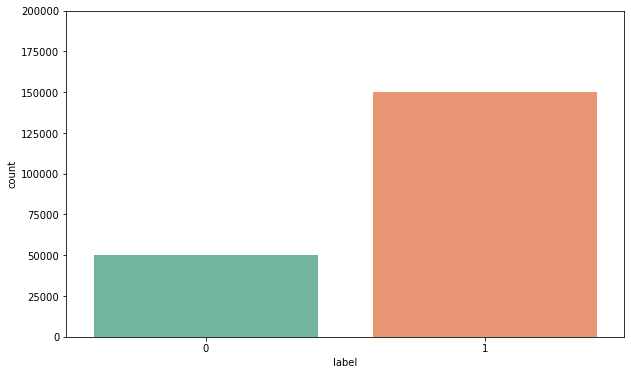

In [96]:
#Check count of Label
plt.figure(figsize=(10,6))
sns.countplot(df_downsampled['label'],palette='Set2')
plt.ylim(0,200000)
plt.show()
#As we can see now the data is enough balanced to train a model

In [97]:
vif_df=pd.DataFrame()
vif_df['Features']=df_downsampled.columns
vif_df['VIF']=[variance_inflation_factor(df_downsampled.values,x) for x in range(len(df_downsampled.columns))]

In [98]:
vif_df.sort_values(by='VIF')

,Features,VIF
1,aon,1.009506
6,last_rech_date_ma,1.013524
7,last_rech_date_da,1.045687
20,fr_da_rech30,1.226637
13,medianmarechprebal30,1.270266
18,medianmarechprebal90,1.357918
22,fr_da_rech90,1.493380
19,cnt_da_rech30,1.878305
21,cnt_da_rech90,1.900896
15,fr_ma_rech90,1.990988


In [99]:
df_downsampled_copy=df_downsampled.copy()

In [100]:
df_downsampled_copy=df_downsampled_copy.drop(['medianamnt_loans30','medianamnt_ma_rech90','amnt_loans90','sumamnt_ma_rech30','sumamnt_ma_rech90',
                         'cnt_ma_rech90','daily_decr90','amnt_loans30'],axis=1)

In [101]:
df_downsampled_copy.shape

(200000, 26)

In [102]:
#Scale data
scale=MinMaxScaler()
X=df_downsampled_copy.drop('label',axis=1)
y=df_downsampled_copy['label']

In [103]:
X=scale.fit_transform(X)

Remove Features with variance less than 0.001
select=VarianceThreshold(threshold=0.001)
X=select.fit_transform(X)

In [104]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
#Create Function which will evaluate model's performance
model_list=[]
score_list=[]
def model_sel(mod):
    model=mod
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    f1score=f1_score(y_test,predict)
    model_list.append(str(mod))
    score_list.append(round(f1score,3))
    print("****************** Metrics *********************")
    print()
    print("Accuracy of the model is {}".format(accuracy_score(y_test,predict)))
    print("Recall of the model is {}".format(recall_score(y_test,predict)))
    print("Precision of the model is {}".format(precision_score(y_test,predict)))
    print("F1 score of the model is {}".format(f1score))
    print()
    print("************** Confusion Matrix ****************")
    print()
    print(confusion_matrix(y_test,predict))
    print()
    print("*********** Classification Report **************")
    print()
    print(classification_report(y_test,predict))

In [106]:
#Run model for Logistic Regression
model_sel(LogisticRegression(max_iter=3000))

****************** Metrics *********************

Accuracy of the model is 0.7998666666666666
Recall of the model is 0.9210274658067386
Precision of the model is 0.8304224900242626
F1 score of the model is 0.8733814163397866

************** Confusion Matrix ****************

[[ 6578  8457]
 [ 3551 41414]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.65      0.44      0.52     15035
           1       0.83      0.92      0.87     44965

    accuracy                           0.80     60000
   macro avg       0.74      0.68      0.70     60000
weighted avg       0.79      0.80      0.79     60000



In [107]:
#Run Model for RandomForestClassifier
model_sel(RandomForestClassifier())

****************** Metrics *********************

Accuracy of the model is 0.9444833333333333
Recall of the model is 0.9653063493828533
Precision of the model is 0.9607977687267576
F1 score of the model is 0.963046782263343

************** Confusion Matrix ****************

[[13264  1771]
 [ 1560 43405]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     15035
           1       0.96      0.97      0.96     44965

    accuracy                           0.94     60000
   macro avg       0.93      0.92      0.93     60000
weighted avg       0.94      0.94      0.94     60000



In [108]:
#Run Model for AdaBoostClassifier
model_sel(AdaBoostClassifier())

****************** Metrics *********************

Accuracy of the model is 0.8532833333333333
Recall of the model is 0.9429556321583453
Precision of the model is 0.8717463711501295
F1 score of the model is 0.9059538689999251

************** Confusion Matrix ****************

[[ 8797  6238]
 [ 2565 42400]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.77      0.59      0.67     15035
           1       0.87      0.94      0.91     44965

    accuracy                           0.85     60000
   macro avg       0.82      0.76      0.79     60000
weighted avg       0.85      0.85      0.85     60000



In [ ]:
#Run Model for Support Vector Machines
model_sel(SVC())

In [55]:
#Run Model for KNeighbors
model_sel(KNeighborsClassifier())

****************** Metrics *********************

Accuracy of the model is 0.8485
Recall of the model is 0.8952963415990215
Precision of the model is 0.9018347185196801
F1 score of the model is 0.8985536359983929

************** Confusion Matrix ****************

[[10653  4382]
 [ 4708 40257]]

*********** Classification Report **************

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     15035
           1       0.90      0.90      0.90     44965

    accuracy                           0.85     60000
   macro avg       0.80      0.80      0.80     60000
weighted avg       0.85      0.85      0.85     60000



In [19]:
import XGBoost as xgb

#Create XGboost Dataset
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

#Create Parameters for XGboost
param = {
    'eta': 0.6, 
    'max_depth': 30,  
    'objective': 'multi:softprob',  
    'num_class': 3}
steps = 80  # The number of training iterations

#Train the model
model = xgb.train(param, D_train, steps)

#Perform Prediction
preds = model.predict(D_test)

#Choose best Prediction
best_preds = np.asarray([np.argmax(line) for line in preds])

print("****************** Metrics *********************")
print()
print("Accuracy of the model is {}".format(accuracy_score(y_test,best_preds)))
print("Recall of the model is {}".format(recall_score(y_test,best_preds)))
print("Precision of the model is {}".format(precision_score(y_test,best_preds)))
print("F1 score of the model is {}".format(f1_score(y_test,best_preds)))
print()
print("************** Confusion Matrix ****************")
print()
print(confusion_matrix(y_test,best_preds))
print()
print("*********** Classification Report **************")
print()
print(classification_report(y_test,best_preds))

model_list.append('XGBoost')
score_list.append(round(f1_score(y_test,best_preds),3))

ModuleNotFoundError: No module named 'xgboost'

FileNotFoundError: [Errno 2] No such file or directory: 'Images//6.Model_Performance.jpeg'

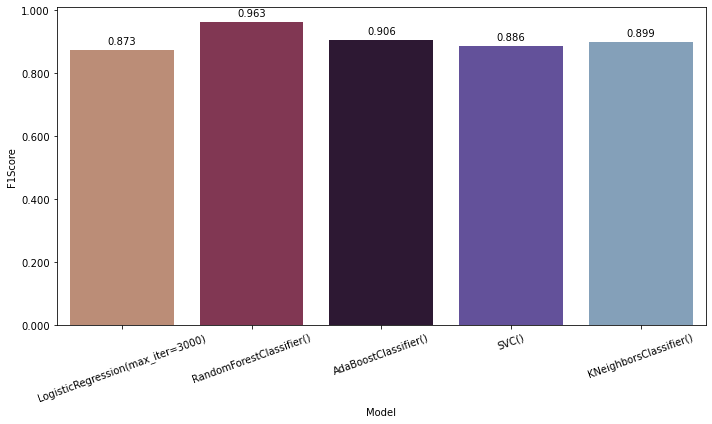

In [59]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
splot=sns.barplot(x=model_list,y=score_list,palette='twilight_r',tick_label=score_list,ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0.00, 9.00), 
                   textcoords = 'offset points')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel('Model')
ax.set_ylabel('F1Score')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('Images//6.Model_Performance.jpeg',dpi=300)
plt.show()

.From the above graph we can see that RandomForestClassifier is working very well
.So we will try to hypertune its paramters

In [ ]:
#Instantiate object for RandomForest to optimize parameters
model=RandomForestClassifier()
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [ ]:
cross_val_score(model,X_train,y_train,cv=4).mean()

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,predict)
auc(fpr,tpr)

In [ ]:
threshold.sort()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,marker='o',markerfacecolor='red',markersize=10,linestyle='-.')
plt.plot(threshold)
plt.ylim(0,1.3)
plt.xlim(0,1.3)
plt.savefig('Images//7.AUC_ROC_Curve.jpeg',dpi=300)
plt.show()

In [ ]:
#Hypertune Parameter
params={'n_estimators':[100,130,150,170,190,210,230,250,270,290,310,330]}
gscv=GridSearchCV(model,params)

In [ ]:
gscv.fit(X_train,y_train)

In [ ]:
best_param=gscv.best_params_
best_param['n_estimators']

In [ ]:
model=RandomForestClassifier(n_estimators=best_param['n_estimators'])
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [ ]:
print("****************** Metrics *********************")
print()
print("Accuracy of the model is {}".format(accuracy_score(y_test,predict)))
print("Recall of the model is {}".format(recall_score(y_test,predict)))
print("Precision of the model is {}".format(precision_score(y_test,predict)))
print("F1 score of the model is {}".format(f1_score(y_test,predict)))
print()
print("************** Confusion Matrix ****************")
print()
print(confusion_matrix(y_test,predict))
print()
print("*********** Classification Report **************")
print()
print(classification_report(y_test,predict))

In [ ]:
df_predict=pd.DataFrame(pd.Series(predict))
df_test=pd.DataFrame(pd.Series(y_test))
df_predict=pd.concat([df_predict.reset_index().drop('index',axis=1),df_test.reset_index().drop('index',axis=1)],axis=1)
df_predict.columns=['Predicted','Original']
df_pred

In [ ]:
df_predict.loc[df_predict['Predicted']==df_predict['Original'],'Result']=True
df_predict.loc[df_predict['Predicted']!=df_predict['Original'],'Result']=False

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df_predict['Result'],palette='twilight')
plt.savefig('Images//8.Result.jpeg',dpi=300)
plt.show()

In [ ]:
joblib.dump(model,'Micro Credit Defaulter RF.obj')

In [ ]:
model= joblib.load('Micro Credit Defaulter RF.obj')
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)